In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# ETF returns simulation

## Define functions

In [91]:
def get_inflation_adj_returns(returns, infl_r):
    return ((1 + np.array(returns)) / (1 + infl_r)) - 1

In [196]:
def get_outcome(initial_input, ongoing_input, t_range, r):
    
    outcome = initial_input
    outcome_raw = initial_input
    
    vals = [initial_input]
    vals_raw = [initial_input]
    
    for t in range(t_range):
        outcome = (outcome + ongoing_input) * (1 + r) 
        outcome_raw = outcome_raw + ongoing_input
        vals.append(outcome)
        vals_raw.append(outcome_raw)
    
    return outcome, vals, vals_raw

In [197]:
def get_output(initial_input, ongoing_input, t_range, r, infl_r):
    
    out, vals, vals_raw = get_outcome(initial_input, ongoing_input, t_range, r)
    
    out_nfl_adj = get_inflation_adj_returns(out, infl_r)
    vals_infl_adj = get_inflation_adj_returns(vals, infl_r)
    vals_raw_infl_adj = vals_inf_adj = get_inflation_adj_returns(vals_raw, infl_r)
    
    plt.figure(figsize = (12, 5))
    
    plt.plot(vals, label = 'Compound', alpha = .7)
    plt.plot(vals_raw, label = 'Raw', alpha = .7)
    plt.plot(vals_raw_infl_adj, label = 'Raw infl. adj.', alpha = .7)
    plt.plot(vals_infl_adj, label = 'Compound infl. adj.', alpha = .7)
    plt.title(f'Returns after {t_range} periods')
    plt.legend()
    plt.xlabel('Period', alpha = .5, fontsize = 14)
    plt.ylabel('Returns', alpha = .5, fontsize = 14)
    plt.show()
    
    print('-' * 50)
    print('\n--- NO INFL. ADJ. ---')
    print(f'Raw sum: {vals_raw[-1]}\nSum with compound: {vals[-1]}')
    print(f'\nDifference = {vals[-1] - vals_raw[-1]}\n')
    print('-' * 50)    


    print('\n--- INFL. ADJ. ---')    
    print(f'Raw sum: {vals_raw_infl_adj[-1]}\nSum with compound: {vals_infl_adj[-1]}')
    print(f'\nDifference = {vals_infl_adj[-1] - vals_raw_infl_adj[-1]}\n')   
    print('-' * 50)
    

In [198]:
def get_r(out, x, t):
    return (out / x)**(1/t) - 1

## Simulate

In [225]:
# Assumptions
etf_r = .075
infl_r = .035
t = 7
ongoing_input = 8.5e3 * 12
initial_input = 20e3

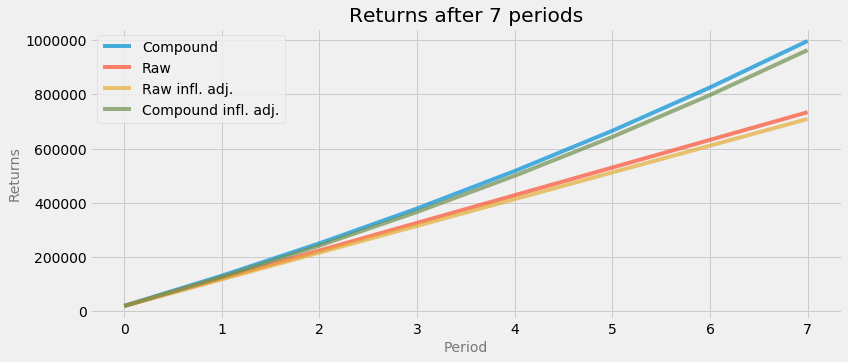

--------------------------------------------------

--- NO INFL. ADJ. ---
Raw sum: 734000.0
Sum with compound: 996710.8255650266

Difference = 262710.8255650266

--------------------------------------------------

--- INFL. ADJ. ---
Raw sum: 709178.7101449276
Sum with compound: 963005.5947488181

Difference = 253826.88460389047

--------------------------------------------------


In [226]:
get_output(initial_input, ongoing_input, t, etf_r, infl_r)